# Pre-lecture Q1. - Q4.

## Q1.

In [1]:
import pandas as pd 
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [2]:
import plotly.express as px

In [3]:
import plotly.graph_objects as go

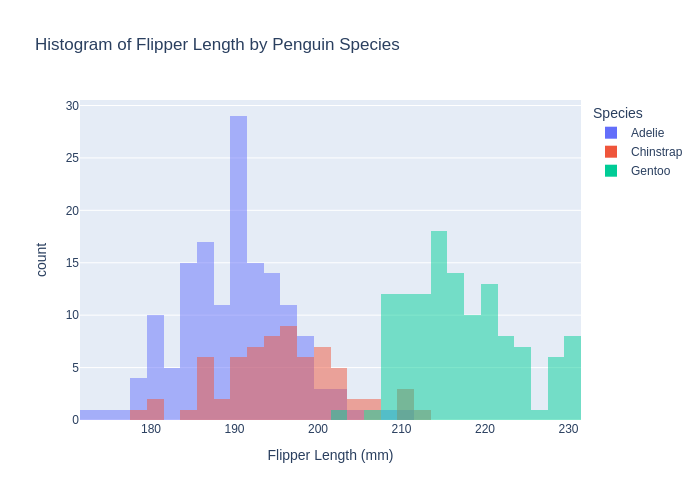

In [18]:
fig = px.histogram(penguins, x="flipper_length_mm", color="species", barmode="overlay",
                   title="Histogram of Flipper Length by Penguin Species",
                   labels={'flipper_length_mm':'Flipper Length (mm)', 'species':'Species'},
                   nbins=30)
fig.show(renderer="png")

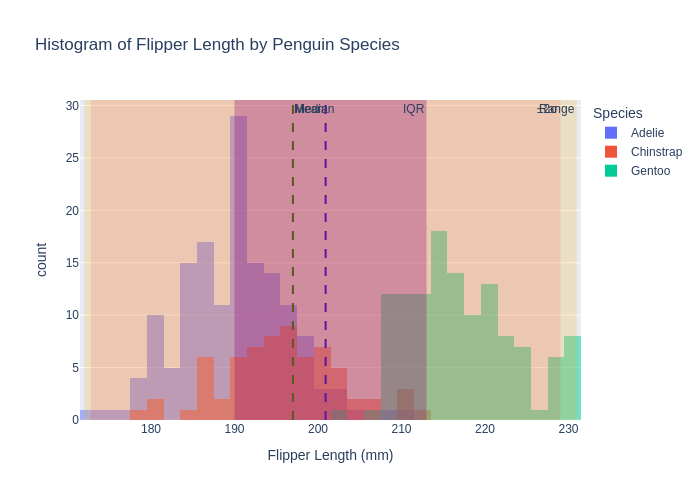

In [19]:
fig = px.histogram(penguins, x="flipper_length_mm", color="species", barmode="overlay",
                   title="Histogram of Flipper Length by Penguin Species",
                   labels={'flipper_length_mm':'Flipper Length (mm)', 'species':'Species'},
                   nbins=30)

# Define statistical measures for flipper_length_mm
mean_flipper = penguins['flipper_length_mm'].mean()
median_flipper = penguins['flipper_length_mm'].median()
std_flipper = penguins['flipper_length_mm'].std()
min_flipper = penguins['flipper_length_mm'].min()
max_flipper = penguins['flipper_length_mm'].max()
q1_flipper = penguins['flipper_length_mm'].quantile(0.25)
q3_flipper = penguins['flipper_length_mm'].quantile(0.75)

# Add vertical lines for the mean and median
fig.add_vline(x=mean_flipper, line=dict(color="blue", dash="dash"), annotation_text="Mean", annotation_position="top left")
fig.add_vline(x=median_flipper, line=dict(color="green", dash="dash"), annotation_text="Median", annotation_position="top right")

# Add rectangles for different ranges
# 1. Total range (min to max)
fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="orange", opacity=0.2, line_width=0, annotation_text="Range")

# 2. Interquartile range (IQR: Q1 to Q3)
fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="purple", opacity=0.3, line_width=0, annotation_text="IQR")

# 3. Range of ±2 standard deviations from the mean
fig.add_vrect(x0=mean_flipper - 2*std_flipper, x1=mean_flipper + 2*std_flipper,
              fillcolor="red", opacity=0.1, line_width=0, annotation_text="±2σ")

fig.show(renderer="png")

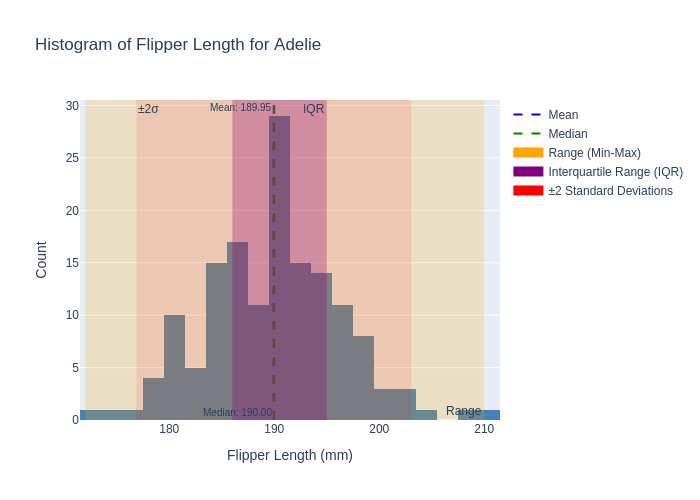

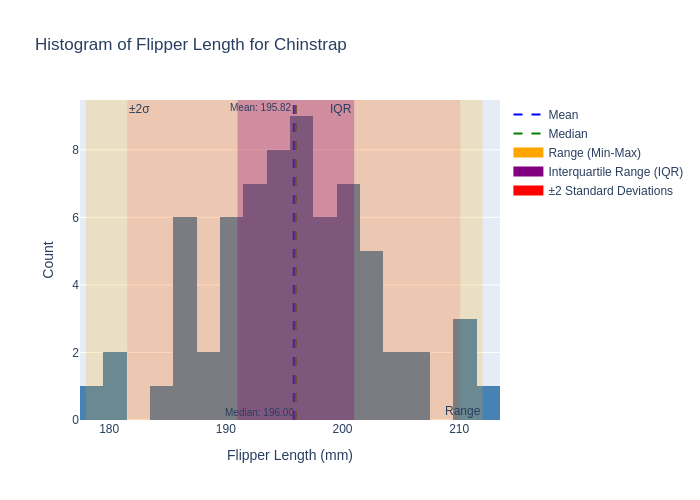

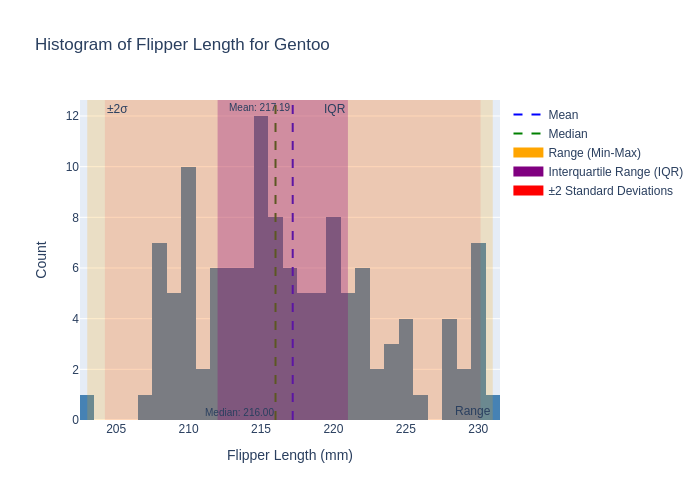

In [20]:
# List of unique species
species_list = penguins['species'].unique()

# Loop over each species and create a separate figure
for species in species_list:
    # Filter the dataset by species
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistical measures for the species
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    std_flipper = species_data['flipper_length_mm'].std()
    min_flipper = species_data['flipper_length_mm'].min()
    max_flipper = species_data['flipper_length_mm'].max()
    q1_flipper = species_data['flipper_length_mm'].quantile(0.25)
    q3_flipper = species_data['flipper_length_mm'].quantile(0.75)

    # Create the histogram for the current species
    fig = px.histogram(species_data, x="flipper_length_mm", nbins=30, title=f"Histogram of Flipper Length for {species}",
                       labels={'flipper_length_mm': 'Flipper Length (mm)'}, color_discrete_sequence=['steelblue'])

    # Add vertical lines for the mean and median
    fig.add_vline(x=mean_flipper, line=dict(color="blue", dash="dash"), 
                  annotation_text=f"Mean: {mean_flipper:.2f}", annotation_position="top left", annotation_font=dict(size=10))
    fig.add_vline(x=median_flipper, line=dict(color="green", dash="dash"), 
                  annotation_text=f"Median: {median_flipper:.2f}", annotation_position="bottom left", annotation_font=dict(size=10))

    # Add rectangles for different ranges
    # 1. Total range (min to max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="orange", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="bottom right")
    
    # 2. Interquartile range (IQR: Q1 to Q3)
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="purple", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="top right")
    
    # 3. Range of ±2 standard deviations from the mean
    fig.add_vrect(x0=mean_flipper - 2*std_flipper, x1=mean_flipper + 2*std_flipper, 
                  fillcolor="red", opacity=0.1, line_width=0, annotation_text="±2σ", annotation_position="top left")

    # Add scatter traces for legend (dummy scatter points for legends)
    fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", line=dict(color="blue", dash="dash"), showlegend=True, name="Mean"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", line=dict(color="green", dash="dash"), showlegend=True, name="Median"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", line=dict(color="orange", width=10), showlegend=True, name="Range (Min-Max)"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", line=dict(color="purple", width=10), showlegend=True, name="Interquartile Range (IQR)"))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode="lines", line=dict(color="red", width=10), showlegend=True, name="±2 Standard Deviations"))

    # Update layout for each figure
    fig.update_layout(xaxis_title="Flipper Length (mm)", yaxis_title="Count")

    # Show the figure for the current species
    fig.show(renderer="png")

## Q2.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

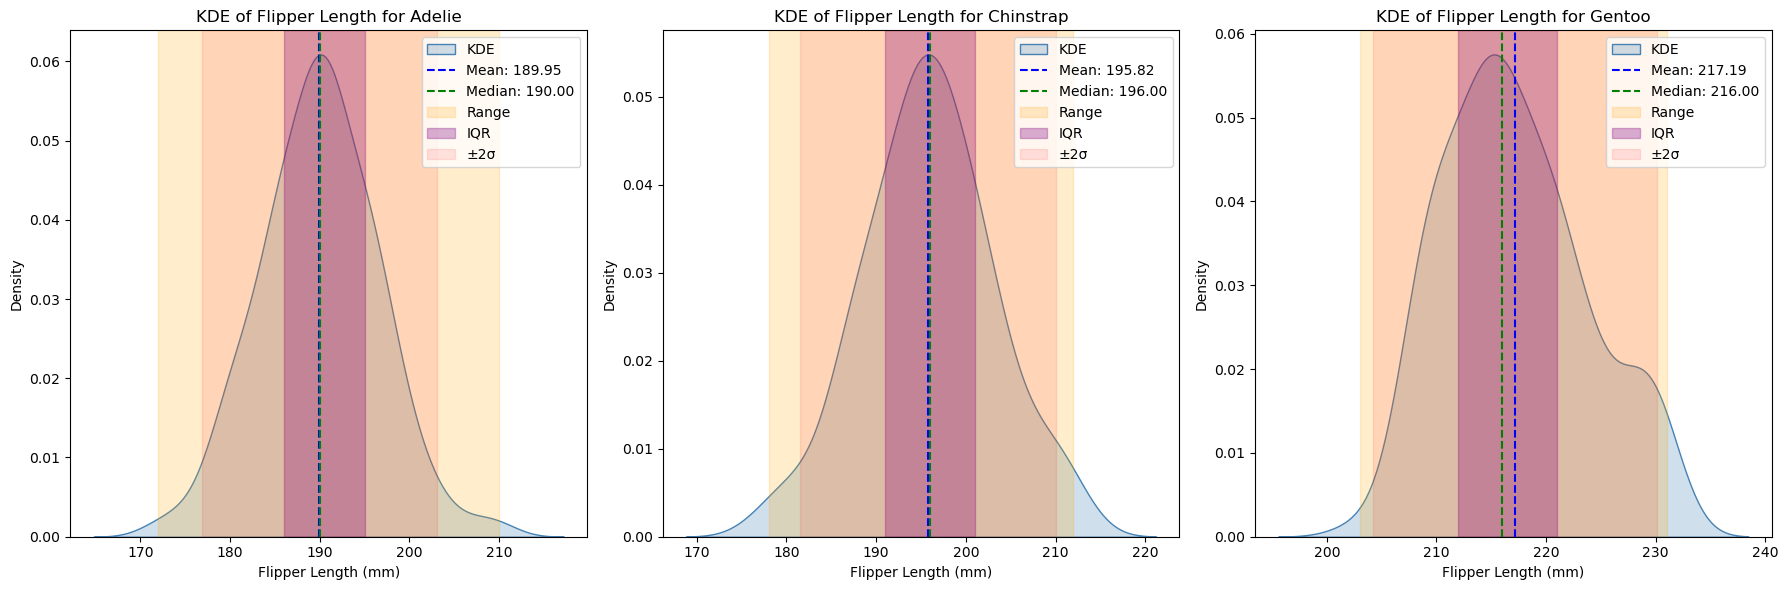

In [34]:
# List of unique species
species_list = penguins['species'].unique()

# Set up the figure with 3 columns
num_cols = 3
num_rows = (len(species_list) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop over each species and create a KDE plot
for i, species in enumerate(species_list):
    # Filter the dataset by species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistical measures for the species
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    std_flipper = species_data.std()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1_flipper = species_data.quantile(0.25)
    q3_flipper = species_data.quantile(0.75)

    # Create the KDE plot on the specific axis
    ax = axes[i]
    sns.kdeplot(species_data, fill=True, ax=ax, color="steelblue", label="KDE")
    
    # Add vertical lines for the mean and median
    ax.axvline(mean_flipper, color="blue", linestyle="--", label=f"Mean: {mean_flipper:.2f}")
    ax.axvline(median_flipper, color="green", linestyle="--", label=f"Median: {median_flipper:.2f}")
    
    # Add shaded areas for the ranges
    # 1. Total range (min to max)
    ax.axvspan(min_flipper, max_flipper, alpha=0.2, color="orange", label="Range")
    
    # 2. Interquartile range (IQR: Q1 to Q3)
    ax.axvspan(q1_flipper, q3_flipper, alpha=0.3, color="purple", label="IQR")
    
    # 3. Range of ±2 standard deviations from the mean
    ax.axvspan(mean_flipper - 2*std_flipper, mean_flipper + 2*std_flipper, alpha=0.1, color="red", label="±2σ")
    
    # Add a title and legend to each subplot
    ax.set_title(f"KDE of Flipper Length for {species}")
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")
    ax.legend()

# Remove unused axes (if the number of species isn't a multiple of 3)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig("figure.png", format="png")
plt.show()

# Q3.

## I believe that all three data visualizations have its own limitations and strength, and thus they all should be used for different purpose and situation. If you want to show the modality of the data, histograms or KDE should be used. If you want to handle outliers and provide summary statistics of the data, the box plot should be used. In addition, you can add annotations or additional informations such as sample size to a box plot or summary statistics to a histogram or KDE to support the limitations of the data visualizations. 

# Q4.

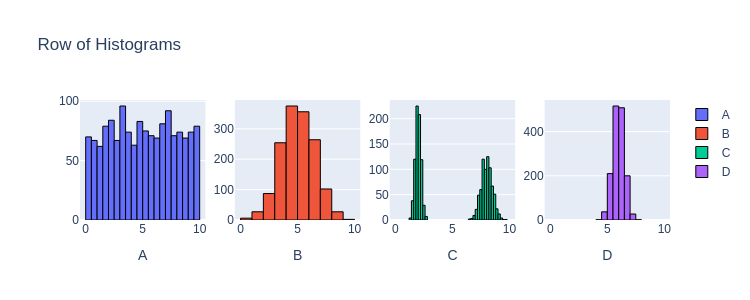

In [25]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 1. I think B and C has similar means and similar variances.
## 2. I think A and B has similar means but quite different variances.
## 3. I think A and C has similar variance but quite different means.
## 4. I think C and D has quite different means and quite different variances.

Sure! Here's a summary of our exchanges on data visualization methods (histogram, box plot, and KDE) and their strengths and weaknesses:

---

### 1. **Understanding Data Visualizations**:
- You explored three data visualization techniques: histograms, box plots, and Kernel Density Estimators (KDE).
  
### 2. **Your Initial Observations**:
- **Box Plot**: 
  - Excellent at providing summary statistics (mean, median, quartiles) but lacks the ability to show the shape and size of the data.
- **Histogram**: 
  - Offers a clear view of the data's shape and size but is dependent on the number of bins, which can influence the appearance of the distribution.
- **KDE**: 
  - Overcomes the bin limitation of histograms by showing a continuous estimate of the data distribution, providing a smoother and more accurate representation of the data’s shape.

### 3. **Further Discussion – Additional Pros and Cons**:
I added to your observations with a detailed comparison:

#### **Box Plot**:
- **Pros**:
  - Compact, summarizes key statistics (median, quartiles, outliers).
  - Handles outliers well and allows easy comparison between groups.
- **Cons**:
  - Doesn’t show the distribution’s shape (e.g., modality, skewness).
  - Can be misinterpreted, especially regarding whiskers and outliers.
  - Can hide data complexity (two datasets may look similar in box plots but have different underlying distributions).

#### **Histogram**:
- **Pros**:
  - Simple, intuitive, and widely understood.
  - Shows frequency distribution effectively.
  - Suitable for discrete data.
- **Cons**:
  - Sensitive to the choice of bin size, which can dramatically change the interpretation.
  - Noisy with small datasets.
  - Hard to compare multiple distributions due to potential overlap.

#### **KDE**:
- **Pros**:
  - Smooth, continuous representation of the data’s probability density.
  - Less arbitrary than histograms (since it doesn’t depend on bin size) and often better for small datasets.
  - Great for visualizing distribution shape (unimodal, bimodal, etc.).
- **Cons**:
  - Sensitive to the choice of bandwidth, which controls the smoothness of the curve.
  - Does not show actual frequencies or counts.
  - Not suitable for discrete or categorical data.
  - Computationally more intensive for larger datasets.

### 4. **Conclusion**:
We concluded that:
- **Box Plots**: Best for summarizing data, comparing groups, and identifying outliers but limited in showing data shape.
- **Histograms**: Good for visualizing distribution shape but dependent on bin size and can become noisy with small datasets.
- **KDE**: Provides a smooth, refined distribution shape but lacks count information and is sensitive to bandwidth.

---

This summary captures the essence of our discussions and provides a comprehensive comparison of the three data visualization techniques, highlighting their appropriate use cases, strengths, and limitations. You can submit this as a record for your homework assignment.

https://chatgpt.com/share/66f3773f-3a60-8009-960b-df3f5558cec2

# Post-lecture Q5. - Q9.

## Q5.

3.98805621121611
[3.3547319]


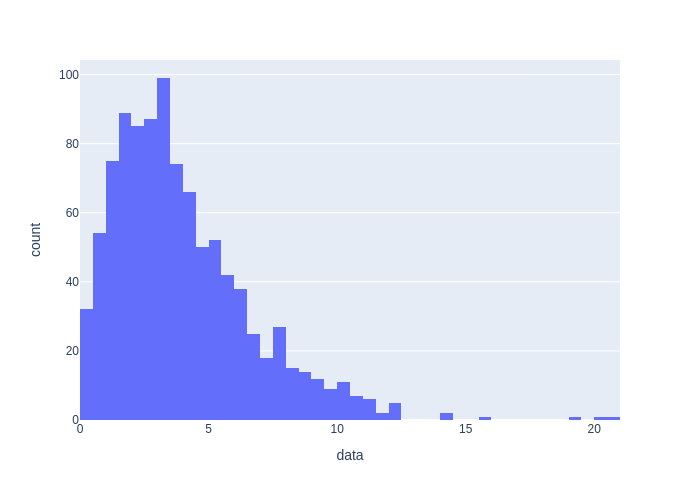

In [26]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print(sample1.mean())
print(np.quantile(sample1, [0.5])) # median

fig1.show(renderer="png")

-4.022265117848078
[-3.50195774]


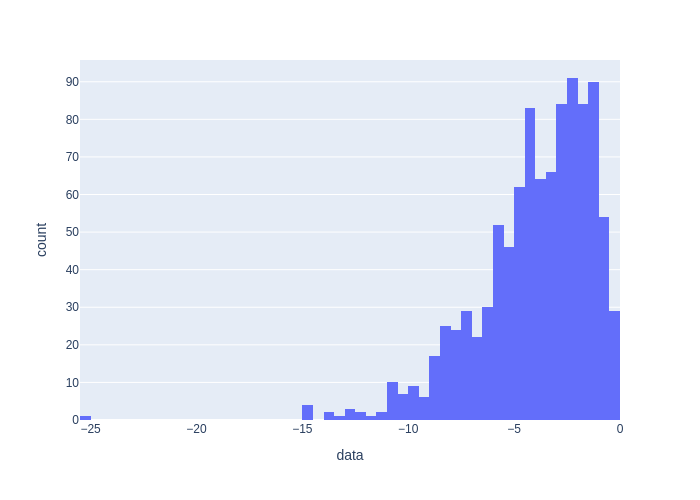

In [27]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

print(sample2.mean())
print(np.quantile(sample2, [0.5])) # median

fig2.show(renderer="png")

## The right skewed distribution has a mean greater than the median because of the outliers pulls the toward the right. Figure 1 shows the right skewed distribution where the mean is 3.988 but the median is 3.354.

## The left skewed  distribution has a mean smaller than the median because of the outliers pulls the toward the left. Figure 2 shows the left skewed distribution where the mean is -4.022 but the median is -3.501.

### Summary of Exchanges

1. **Mean, Median, and Skewness**:
   - Discussed the general relationship between the mean and median in relation to skewness:
     - **Right Skewness**: Mean > Median.
     - **Left Skewness**: Mean < Median.
     - **Symmetric Distribution**: Mean ≈ Median.

2. **Code Explanation**:
   - Provided a detailed breakdown of a code snippet using Python libraries (`scipy`, `numpy`, `pandas`, and `plotly`) to:
     - Generate a sample from a gamma distribution (`sample1`).
     - Create a histogram to visualize the distribution of `sample1`.
     - Calculate the mean and median of `sample1`.
     - Generate a second sample (`sample2`) from a negative gamma distribution.
   - Explained the implications of the generated distributions regarding their skewness.

If you need any additional information or formatting adjustments, feel free to ask!

https://chatgpt.com/share/66f380e3-a498-8009-b420-428c497856d8

# Q6.

In [3]:
import pandas as pd 
lego = pd.read_csv("https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv")

lego

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,159.99,199.99,149.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,199.99,229.99,179.99,Box,Retail - limited
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,99.99,119.99,89.99,Box,LEGO exclusive
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,79.99,NaN,69.99,Box,LEGO exclusive
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,9.99,12.99,9.99,Box,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,647,Lorry With Girders,1971,LEGOLAND,Vehicle,52.0,NaN,http://images.brickset.com/sets/images/647-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6168,648,Service Station,1971,LEGOLAND,Building,55.0,NaN,http://images.brickset.com/sets/images/648-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6169,795,"2 Large Baseplates, Red/Blue",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/795-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified
6170,796,"2 Large Baseplates, Green/Yellow",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/796-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified


In [4]:
lego.isnull().sum()

Item_Number        0
Name               0
Year               0
Theme              0
Subtheme        2206
Pieces           112
Minifigures     2672
Image_URL          0
GBP_MSRP        1980
USD_MSRP         355
CAD_MSRP        4190
EUR_MSRP        4399
Packaging          0
Availability       0
dtype: int64

In [5]:
del lego['GBP_MSRP']
del lego['CAD_MSRP']
del lego['EUR_MSRP']

del lego['Subtheme']
del lego['Minifigures']

lego_cleaned = lego.dropna()

print (lego_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5710 entries, 0 to 6171
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Item_Number   5710 non-null   object 
 1   Name          5710 non-null   object 
 2   Year          5710 non-null   int64  
 3   Theme         5710 non-null   object 
 4   Pieces        5710 non-null   float64
 5   Image_URL     5710 non-null   object 
 6   USD_MSRP      5710 non-null   float64
 7   Packaging     5710 non-null   object 
 8   Availability  5710 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 446.1+ KB
None


In [7]:
lego.describe()

,Year,Pieces,USD_MSRP
count,6172.000000,6060.000000,5817.000000
mean,2004.712087,215.168647,27.896813
std,8.914686,356.197637,39.320153
min,1971.000000,0.000000,0.000000
25%,2000.000000,30.000000,6.000000
50%,2006.000000,82.000000,14.990000
75%,2012.000000,256.250000,34.990000
max,2015.000000,5922.000000,789.990000


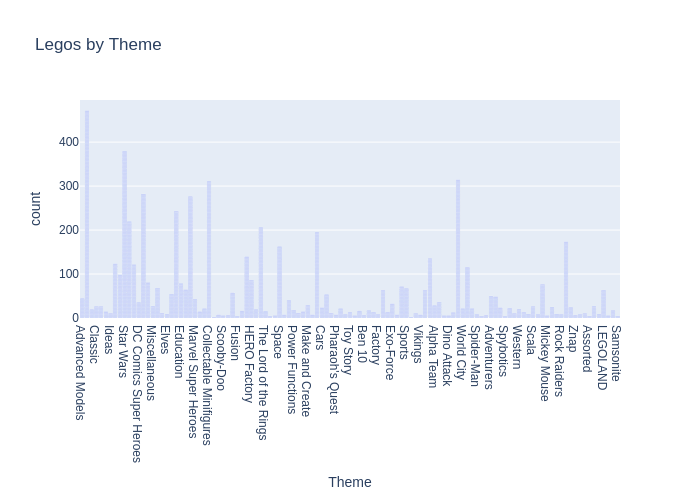

In [10]:
import plotly.express as px

fig = px.bar(lego, x='Theme', title='Legos by Theme')

fig.show(renderer="png")

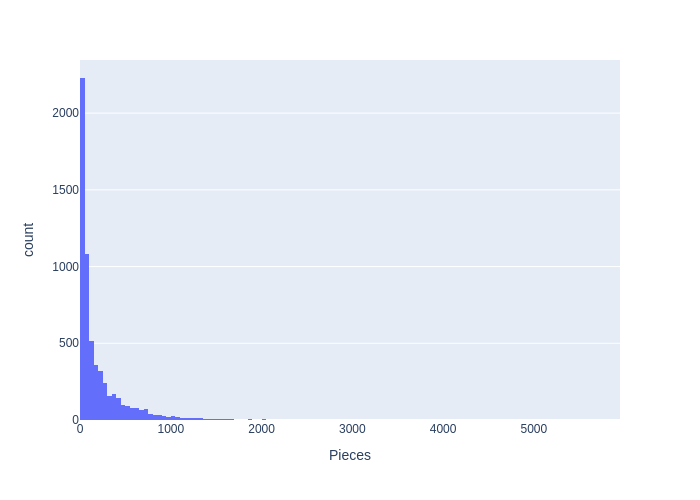

In [17]:
fig2 = px.histogram(lego, x='Pieces')

fig2.show(renderer="png")

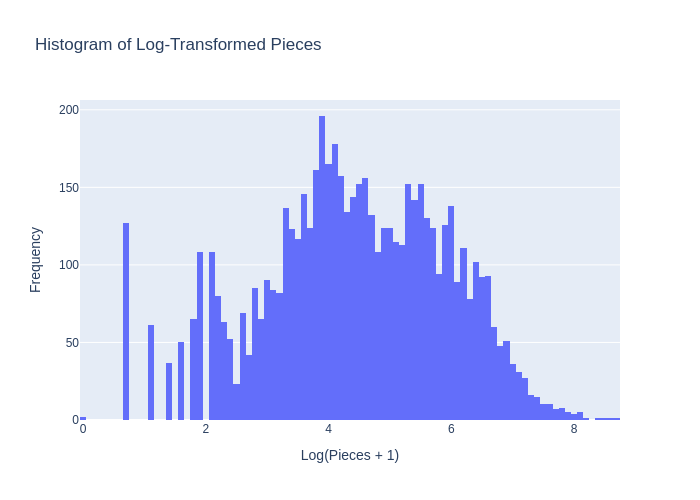

In [21]:
import numpy as np

lego['Log_Pieces'] = np.log1p(lego['Pieces'])  # log1p is used for log(1 + x)
fig3 = px.histogram(lego, x="Log_Pieces", 
                   title="Histogram of Log-Transformed Pieces")
fig3.update_xaxes(title_text="Log(Pieces + 1)")
fig3.update_yaxes(title_text="Frequency")
fig3.show(renderer="png")

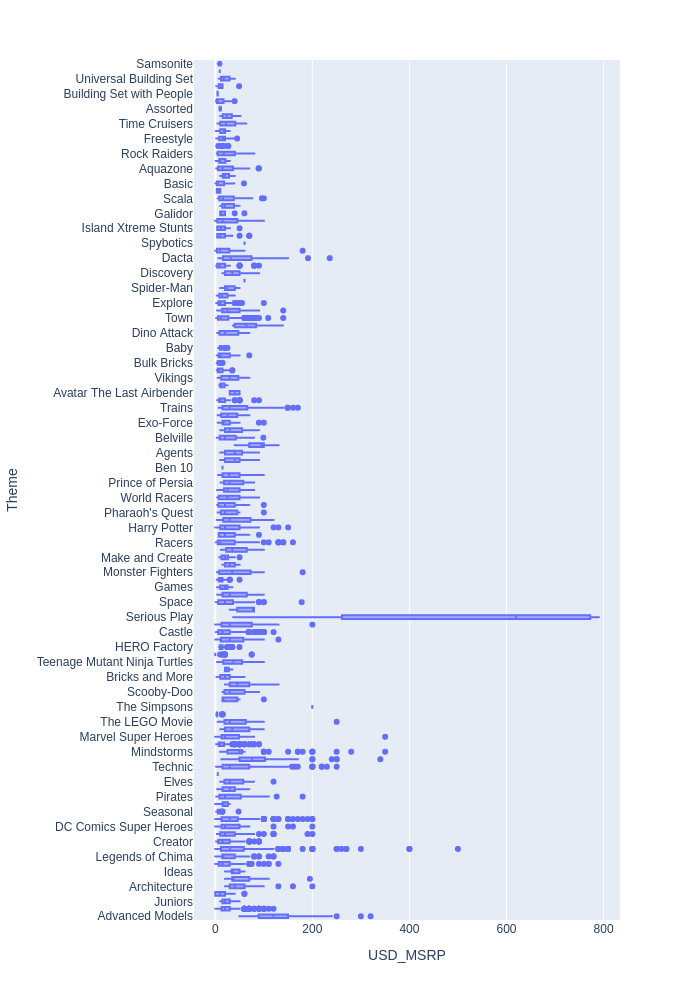

In [27]:
fig4 = px.box(lego, x='USD_MSRP', y="Theme", height=1000)

fig4.show(renderer="png")

# Q7.

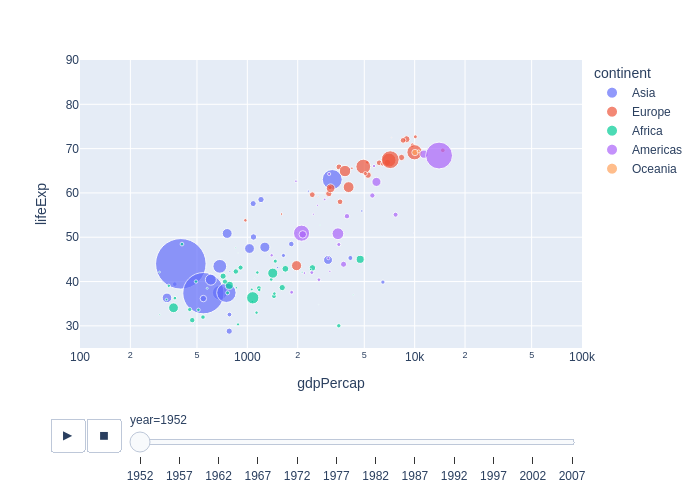

In [23]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer="png")

# Q8.

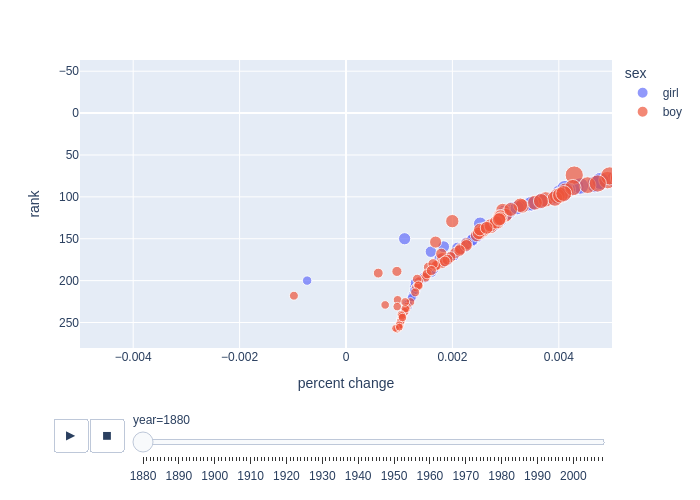

In [69]:
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Q9.

## Yes